<a href="https://colab.research.google.com/github/blkbamboo74/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Once_Again_Dennis_Batiste_DS_Unit_1_Sprint_Challenge_1_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [0]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [6]:
import pandas as pd

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')

df.isna().sum()

headers = ['age', 'year_of_op', 'nodes_detected', 'survived']


df.columns = headers

df.describe ()



,age,year_of_op,nodes_detected,survived
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
33,60,0,1
34,59,0,2
34,66,9,2
34,58,30,1
34,60,1,1
34,61,10,1
34,67,7,1
34,60,0,1
35,64,13,1
35,63,0,1
36,60,1,1
36,69,0,1
37,60,0,1
37,63,0,1
37,58,0,1
37,59,6,1
37,60,15,1
37,63,0,1
38,69,21,2
38,59,2,1
38,60,0,1
38,60,0,1
38,62,3,1
38,64,1,1
38,66,0,1
38,66,11,1
38,60,1,1
38,67,5,1
39,66,0,2
39,63,0,1
39,67,0,1
39,58,0,1
39,59,2,1
39,63,4,1
40,58,2,1
40,58,0,1
40,65,0,1
41,60,23,2
41,64,0,2
41,67,0,2
41,58,0,1
41,59,8,1
41,59,0,1
41,64,0,1
41,69,8,1
41,65,0,1
41,65,0,1
42,69,1,2
42,59,0,2
42,58,0,1
42,60,1,1
42,59,2,1
42,61,4,1
42,62,20,1
42,65,0,1
42,63,1,1
43,58,52,2
43,59,2,2
43,64,0,2
43,64,0,2
43,63,14,1
43,64,2,1
43,64,3,1
43,60,0,1
43,63,2,1
43,65,0,1
43,66,4,1
44,64,6,2
44,58,9,2
44,63,19,2
44,61,0,1
44,63,1,1
44,61,0,1
44,67,16,1
45,65,6,2
45,66,0,2
45,67,1,2
45,60,0,1
45,67,0,1
45,59,14,1
45,64,0,1
45,68,0,1
45,67,1,1
46,58,2,2
46,69,3,2
46,62,5,2
46,65,20,2
46,62,0,1
46,58,3,1
46,63,0,1
47,63,23,2
47,62,0,2
47,6

In [0]:
pd.read_csv?

In [8]:
dataset_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"

column_headers = ['age','year_of_op', 'nodes_detected', 'survived']
df = pd.read_csv(dataset_url, names=column_headers)
df['year_of_op'] = df['year_of_op'] + 1900
df['survived'] = df['survived'] == 1
df.head(25)

,age,year_of_op,nodes_detected,survived
0,30,1964,1,True
1,30,1962,3,True
2,30,1965,0,True
3,31,1959,2,True
4,31,1965,4,True
5,33,1958,10,True
6,33,1960,0,True
7,34,1959,0,False
8,34,1966,9,False
9,34,1958,30,True


In [0]:
#Ok.  I was able to clean up the data and get the headers and columns working correctly.

In [9]:
df.sample(15)
        

,age,year_of_op,nodes_detected,survived
40,40,1958,2,True
74,44,1958,9,False
217,59,1963,0,True
260,65,1962,22,False
211,58,1967,0,True
75,44,1963,19,False
293,72,1963,0,False
21,37,1959,6,True
68,43,1964,3,True
205,57,1964,0,True


In [10]:
df.head (10)

,age,year_of_op,nodes_detected,survived
0,30,1964,1,True
1,30,1962,3,True
2,30,1965,0,True
3,31,1959,2,True
4,31,1965,4,True
5,33,1958,10,True
6,33,1960,0,True
7,34,1959,0,False
8,34,1966,9,False
9,34,1958,30,True


In [11]:
df.count()

age               306
year_of_op        306
nodes_detected    306
survived          306
dtype: int64

In [0]:
!curl data http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data|wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: data
100  3103  100  3103    0     0  10926      0 --:--:-- --:--:-- --:--:-- 10926
    306     306    3103


In [0]:
#Looks like we got clean data.  No missing rows or columns

In [12]:
df.count

<bound method DataFrame.count of      age  year_of_op  nodes_detected  survived
0     30        1964               1      True
1     30        1962               3      True
2     30        1965               0      True
3     31        1959               2      True
4     31        1965               4      True
5     33        1958              10      True
6     33        1960               0      True
7     34        1959               0     False
8     34        1966               9     False
9     34        1958              30      True
10    34        1960               1      True
11    34        1961              10      True
12    34        1967               7      True
13    34        1960               0      True
14    35        1964              13      True
15    35        1963               0      True
16    36        1960               1      True
17    36        1969               0      True
18    37        1960               0      True
19    37        1963       

In [13]:
df.isna().sum()

age               0
year_of_op        0
nodes_detected    0
survived          0
dtype: int64

Data Set Information:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year
# Just making sure that I have all the correct data loaded into the dataframe 

In [20]:
import numpy as np
df = pd.read_csv(dataset_url, names=column_headers)
df = df.replace(" ?", np.NaN)
df['survived'] = df['survived'] == 1
df.head(30)

#Checking for missing values.

,age,year_of_op,nodes_detected,survived
0,30,64,1,True
1,30,62,3,True
2,30,65,0,True
3,31,59,2,True
4,31,65,4,True
5,33,58,10,True
6,33,60,0,True
7,34,59,0,False
8,34,66,9,False
9,34,58,30,True


In [0]:
df = df.fillna('unknown')

In [17]:
df.head(17)

,age,year_of_op,nodes_detected,survived
0,30,64,1,True
1,30,62,3,True
2,30,65,0,True
3,31,59,2,True
4,31,65,4,True
5,33,58,10,True
6,33,60,0,True
7,34,59,0,False
8,34,66,9,False
9,34,58,30,True


In [18]:
df.describe ()
#summary of statics

,age,year_of_op,nodes_detected
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [0]:
import pandas as pd
import numpy as np

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# TODO
df.describe()

,age,year_of_op,nodes_detected,survived
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,0.734426
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


This table shows all the data independant variables.

Age is centered between 44 and 60, but there are some very young or very old patients that we may want to account for when performing further analysis.

Operation Year is a fairly short time period, between 1958 and 1969. It will be interesting to see how much of a difference 11 years of medical knowledge may or may not make.

(array([16., 27., 46., 53., 55., 41., 41., 18.,  7.,  2.]),
 array([30. , 35.3, 40.6, 45.9, 51.2, 56.5, 61.8, 67.1, 72.4, 77.7, 83. ]),
 <a list of 10 Patch objects>)

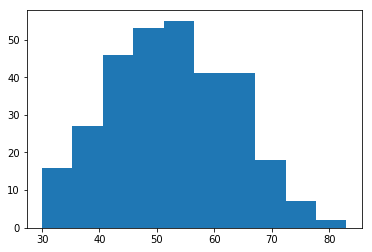

In [0]:
import matplotlib.pyplot as plt
plt.hist(df['age'])

(array([63., 28., 26., 23., 30., 30., 28., 28., 25., 24.]),
 array([58. , 59.1, 60.2, 61.3, 62.4, 63.5, 64.6, 65.7, 66.8, 67.9, 69. ]),
 <a list of 10 Patch objects>)

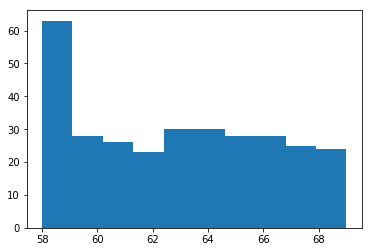

In [0]:
plt.hist(df['year_of_op'])

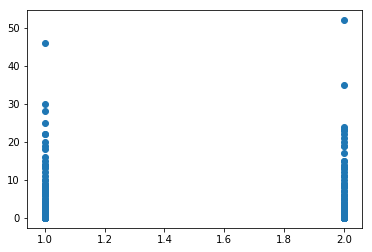

In [0]:
plt.scatter(df['survived'], df['nodes_detected'])

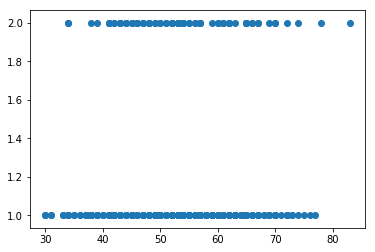

In [0]:
plt.scatter(df['age'], df['survived'])

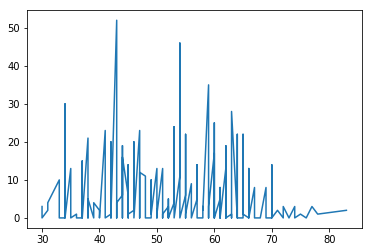

In [0]:
plt.plot(df['age'], df['nodes_detected'])

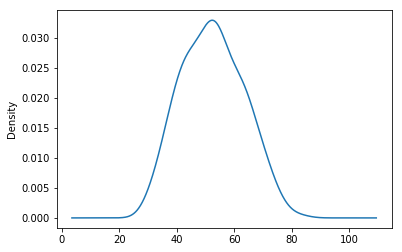

In [0]:
df['age'].plot.density()

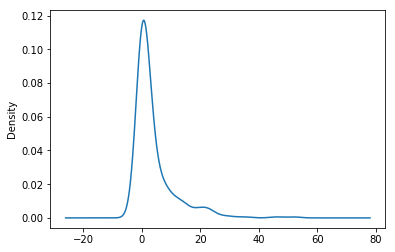

In [0]:
df['nodes_detected'].plot.density()

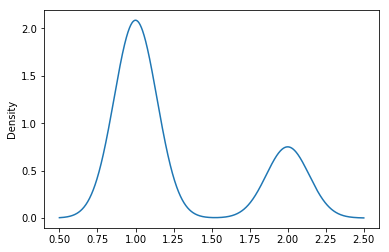

In [0]:
df['survived'].plot.density()

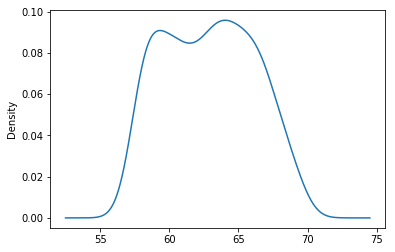

In [0]:
df['year_of_op'].plot.density()

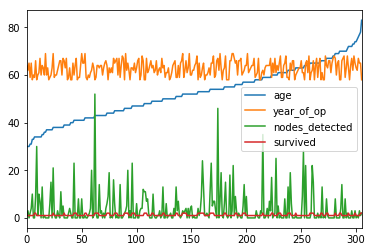

In [0]:
df.plot()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Sections of Graphs used for the final analysis

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


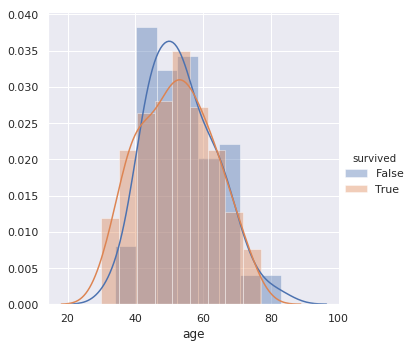

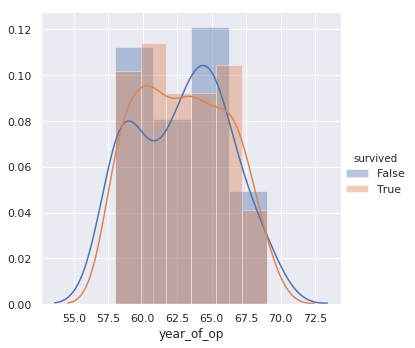

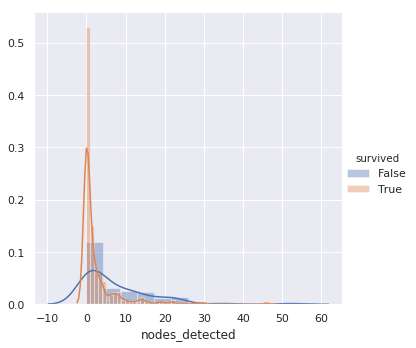

In [21]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='survived', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

In [0]:
#The number of positive lymph nodes of the survivors is highly densed from 0 to 5

In [0]:
#With more data I can see the early detection usally responds to living longer. Women in the early 40's are best to be tested from breast cancer.  
#early detection and treatment means a longer life.

In [0]:
year_of_op_bin = pd.cut(df['year_of_op'], bins=[0, 58, 61, 63, 65, 69])
age_bin = pd.cut(df['age'], bins=[0, 30, 35, 41,42,43, 44,45,46, 51,54, 57, 62, 67, 73, 78, 83])
nodes_detected_bin = pd.cut(df['nodes_detected'], 5)


In [24]:
pd.crosstab(df['survived'], 'year_of_op', normalize='columns')

col_0,year_of_op
survived,
False,0.264706
True,0.735294


In [22]:
pd.crosstab(df['survived'], df['year_of_op'], normalize='columns')

year_of_op,58,59,60,61,62,63,64,65,66,67,68,69
survived,,,,,,,,,,,,
False,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636
True,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364


## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [22]:
column_headers = ['age','year_of_op', 'nodes_detected', 'survived']
Five_df = pd.read_csv(dataset_url, names=column_headers)
Five_df['year_of_op'] = Five_df['year_of_op'] + 1900
Five_df['survived'] = Five_df['survived'] == 1
df.head(5)

,age,year_of_op,nodes_detected,survived
0,30,64,1,True
1,30,62,3,True
2,30,65,0,True
3,31,59,2,True
4,31,65,4,True


In [23]:
Five_df[Five_df['survived']]  #Survived greater than 5 Years

,age,year_of_op,nodes_detected,survived
0,30,1964,1,True
1,30,1962,3,True
2,30,1965,0,True
3,31,1959,2,True
4,31,1965,4,True
5,33,1958,10,True
6,33,1960,0,True
9,34,1958,30,True
10,34,1960,1,True
11,34,1961,10,True


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


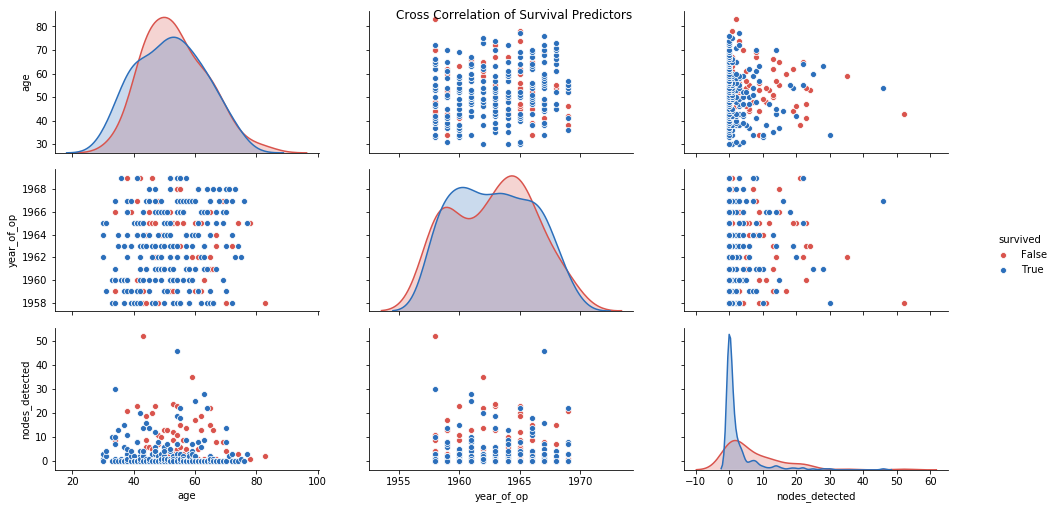

In [25]:
# correlation and impact on survival

import seaborn as sns

survived_color_map = {False : sns.xkcd_rgb["pale red"], True : sns.xkcd_rgb["medium blue"]}

pair_plot = sns.pairplot(Five_df, hue='survived', vars=['age', 'year_of_op', 'nodes_detected'],
             size=3,
             palette=survived_color_map)

pair_plot.fig.set_size_inches(15,7)
pair_plot.fig.suptitle('Cross Correlation of Survival Predictors');

In [0]:
# Nodes found looks to be the strongest predictor of Survival, the two show a clear inverse relationship.

In [26]:
column_headers = ['age','year_of_op', 'nodes_detected', 'survived']
Five_less_df = pd.read_csv(dataset_url, names=column_headers)
Five_less_df['year_of_op'] = Five_less_df['year_of_op'] + 1900
Five_less_df['survived'] = Five_less_df['survived'] == 1
df.head(5)

,age,year_of_op,nodes_detected,survived
0,30,64,1,True
1,30,62,3,True
2,30,65,0,True
3,31,59,2,True
4,31,65,4,True


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


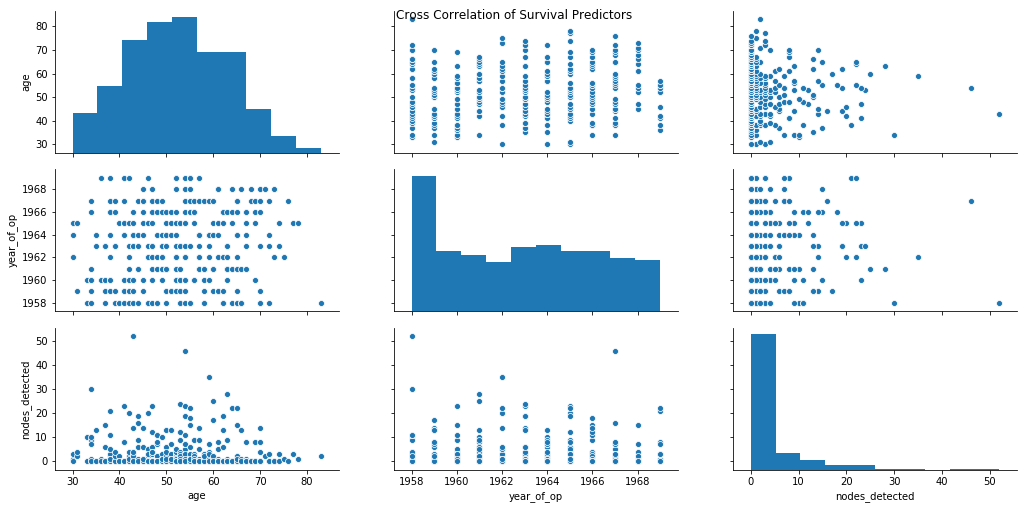

In [30]:
# correlation and impact on survival

import seaborn as sns

survived_color_map = {False : sns.xkcd_rgb["pale red"], True : sns.xkcd_rgb["medium blue"]}

pair_plot = sns.pairplot(Five_df, vars=['age', 'year_of_op', 'nodes_detected'],
             size=3,
             palette=survived_color_map)

pair_plot.fig.set_size_inches(15,7)
pair_plot.fig.suptitle('Cross Correlation of Survival Predictors');

In [0]:
# This was my attempt to seperate the True and False data by colors.  I think the graph above shows both true and false data and has what is need 
# for this assignment

In [28]:
Five_less_df[Five_less_df['survived'] == False] # Died within 5 years


,age,year_of_op,nodes_detected,survived
7,34,1959,0,False
8,34,1966,9,False
24,38,1969,21,False
34,39,1966,0,False
43,41,1960,23,False
44,41,1964,0,False
45,41,1967,0,False
53,42,1969,1,False
54,42,1959,0,False
62,43,1958,52,False


## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

    What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
    What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
    How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Your Text Answer Here


Your Text Answer Here

The only feature that has a positive linear relationship with survival is the year the operation was performed.  1966 or afterwards has a better trend

 nodes found has the most significant negative correlation with survival.  That data stick out in the Five_less_df. 

What I discovred is that getting the breast cancer operation can be a 50/50 odds with women between 40 and 50.  The correclation between them both is that if a patient has a biopsy and it has numerous postive nodes (cancer having cells), that patient is mostly likey in later stages of cancer and may need surgery as their first treatment.  Futher analysis is needed and a bigger dataset showing race, economic breakdown, and region would be helpful.